In [1]:
import warnings

from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning, UndefinedMetricWarning
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

# %matplotlib inline


In [2]:
import os
if os.getcwd().endswith('/notebooks'):
    os.chdir('../')
from utils.io import load_and_prepare

# `Income Group` classification

Authors: Magdalena Oska (174426), Pawel Okrutny (175689), Michal Radziwanowski (163220)

### Load and prepare data

> dataset preperation in 'notebooks/data_description.ipynb' 

In [3]:
source_file = os.path.join(os.getcwd(), 'data/credit.csv')
data = load_and_prepare(source_file)

data.head()


,income,limit,rating,cards,age,education,gender,student,married,ethnicity,balance,income_group
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,The Poor
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,The Rich
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,The Rich
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,The Rich
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,Upper-Middle Class


### Encode categorical output data for prediction

In [4]:
income_groups_map = {
	'The Poor': 0,
	'Working Class': 1,
	'Lower-Middle Class': 2,
    'Upper-Middle Class': 3,
	'The Rich': 4,
}
income_groups = list(income_groups_map.keys())
data['income_group_index'] = data['income_group'].map(income_groups_map)


### Split dataset

First, connect numerical features with one-hot-encoded categories. Then split dataset and take 80% as training and 20% as test subsets.

In [5]:
x = pd.concat(
	(
		data[['education', 'balance', 'age', 'cards', 'limit', 'rating']], 
		pd.get_dummies(data[['student', 'married', 'ethnicity', 'gender']])
	), 
	axis=1
)
y = data['income_group_index']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [7]:
print(f"train: {x_train.shape}")
print(f"test: {x_test.shape}")


train: (320, 15)
test: (80, 15)


In [8]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)


In [9]:
def map_to_income_groups(arr):
	return np.array(list(map(lambda x: list(income_groups_map.keys())[x], arr)))


### Train KNN model

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train_scale, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

Predicted probabilities per class:

In [11]:
knn_model.predict_proba(x_test_scale)


array([[0.        , 0.42857143, 0.14285714, 0.14285714, 0.28571429],
       [0.        , 0.42857143, 0.42857143, 0.14285714, 0.        ],
       [0.14285714, 0.42857143, 0.28571429, 0.14285714, 0.        ],
       [0.        , 0.42857143, 0.42857143, 0.14285714, 0.        ],
       [0.        , 0.14285714, 0.71428571, 0.14285714, 0.        ],
       [0.28571429, 0.42857143, 0.28571429, 0.        , 0.        ],
       [0.14285714, 0.14285714, 0.28571429, 0.42857143, 0.        ],
       [0.        , 0.57142857, 0.28571429, 0.14285714, 0.        ],
       [0.14285714, 0.        , 0.57142857, 0.28571429, 0.        ],
       [0.14285714, 0.14285714, 0.14285714, 0.28571429, 0.28571429],
       [0.        , 0.14285714, 0.14285714, 0.42857143, 0.28571429],
       [0.28571429, 0.14285714, 0.28571429, 0.28571429, 0.        ],
       [0.14285714, 0.28571429, 0.57142857, 0.        , 0.        ],
       [0.42857143, 0.42857143, 0.14285714, 0.        , 0.        ],
       [0.28571429, 0.28571429, 0.

In [12]:
predicted = map_to_income_groups(knn_model.predict(x_test_scale))
real = map_to_income_groups(np.array(y_test))


Predicted on test:

In [13]:
print(predicted)


['Working Class' 'Working Class' 'Working Class' 'Working Class'
 'Lower-Middle Class' 'Working Class' 'Upper-Middle Class' 'Working Class'
 'Lower-Middle Class' 'Upper-Middle Class' 'Upper-Middle Class' 'The Poor'
 'Lower-Middle Class' 'The Poor' 'The Poor' 'Lower-Middle Class'
 'Working Class' 'Upper-Middle Class' 'Lower-Middle Class' 'The Poor'
 'Working Class' 'The Poor' 'Working Class' 'Working Class'
 'Lower-Middle Class' 'Working Class' 'Lower-Middle Class' 'Working Class'
 'Lower-Middle Class' 'The Poor' 'The Poor' 'Upper-Middle Class'
 'The Poor' 'Lower-Middle Class' 'The Poor' 'Working Class'
 'Working Class' 'The Poor' 'Upper-Middle Class' 'Lower-Middle Class'
 'Upper-Middle Class' 'Working Class' 'Working Class' 'The Poor'
 'Lower-Middle Class' 'Lower-Middle Class' 'Working Class' 'The Poor'
 'The Poor' 'The Poor' 'Lower-Middle Class' 'The Poor' 'Working Class'
 'Working Class' 'Lower-Middle Class' 'The Poor' 'Upper-Middle Class'
 'The Poor' 'Working Class' 'Working Class' 

Real test values:

In [14]:
print(real)


['The Rich' 'Upper-Middle Class' 'Lower-Middle Class' 'Working Class'
 'The Poor' 'Lower-Middle Class' 'Upper-Middle Class' 'Lower-Middle Class'
 'Upper-Middle Class' 'Working Class' 'Upper-Middle Class'
 'Upper-Middle Class' 'Upper-Middle Class' 'Working Class' 'Working Class'
 'Lower-Middle Class' 'The Rich' 'Upper-Middle Class' 'Working Class'
 'Working Class' 'Working Class' 'Working Class' 'Upper-Middle Class'
 'Lower-Middle Class' 'The Poor' 'The Poor' 'The Poor' 'The Poor'
 'The Poor' 'The Poor' 'The Poor' 'The Rich' 'The Rich'
 'Upper-Middle Class' 'The Poor' 'Lower-Middle Class' 'Upper-Middle Class'
 'The Poor' 'Lower-Middle Class' 'Upper-Middle Class' 'The Rich'
 'Lower-Middle Class' 'Lower-Middle Class' 'The Poor' 'Working Class'
 'Working Class' 'The Poor' 'Lower-Middle Class' 'Working Class'
 'The Poor' 'Working Class' 'Working Class' 'Lower-Middle Class'
 'Working Class' 'Working Class' 'The Poor' 'Working Class'
 'Upper-Middle Class' 'Lower-Middle Class' 'Lower-Middle Cl

Accuracy of simplest KNN model for predicting `Income Group` (_ratio of correctly predicted observation to the total observations_):

In [15]:
metrics.accuracy_score(y_test, knn_model.predict(x_test_scale))


0.2125

Confusion matrix:

In [16]:
metrics.confusion_matrix(y_test, knn_model.predict(x_test_scale))


array([[ 7,  4,  6,  0,  0],
       [ 9,  4,  7,  2,  0],
       [ 2, 10,  2,  3,  0],
       [ 2,  4,  7,  4,  0],
       [ 2,  3,  0,  2,  0]])

Accuracy and Confution matrix show poor performance of this classification.

More statistics by group. No record was given `The Rich` class by the KNN classificator (from 7 records in this class), resulting in worst precision at 0%, second worst was `Lower-Middle Class` with only 9% records properly classified. Precision reaches highest value of only 36% for `Upper-Middle Class` income group:

In [17]:
precision = metrics.precision_score(y_test, knn_model.predict(x_test_scale), average=None)
recall = metrics.recall_score(y_test, knn_model.predict(x_test_scale), average=None)
f1 = metrics.f1_score(y_test, knn_model.predict(x_test_scale), average=None)
for g, i in income_groups_map.items():
	print(g)
	print(f"\tprecision = {precision[i]:.2f}")
	print(f"\trecall    = {recall[i]:.2f}")
	print(f"\tf1_score  = {f1[i]:.2f}")


The Poor
	precision = 0.32
	recall    = 0.41
	f1_score  = 0.36
Working Class
	precision = 0.16
	recall    = 0.18
	f1_score  = 0.17
Lower-Middle Class
	precision = 0.09
	recall    = 0.12
	f1_score  = 0.10
Upper-Middle Class
	precision = 0.36
	recall    = 0.24
	f1_score  = 0.29
The Rich
	precision = 0.00
	recall    = 0.00
	f1_score  = 0.00


### Declare more models to test

Several models are defined for testing:

1. K-Nearest Neighbour:
    - with k=1,
    - with k=3,
    - with k=7,
    - with k=13,
    - with k=21,
    - with k=35.
2. Decision Tree:
    - default,
    - with entropy criterion instead of gini,
    - with depth limited to 2,
    - with depth limited to 7,
    - with depth limited to 7 and entropy criterion,
    - with depth limited to 7 and minimum of 7 samples for split,
    - with depth limited to 7 and minimum of 12 samples for split,
    - with depth limited to 13,
    - with depth limited to 15.
3. Logistic Regression:
    - fitted without intercept (the constant value added),
    - fitted with intercept.
4. Random Forest:
    - with 10 estimators and weight balancing,
    - with 10 estimators,
    - with 20 estimators and weight balancing,
    - with 20 estimators.

In [18]:
models = {
    'KNN_1':  KNeighborsClassifier(n_neighbors=1),
    'KNN_3':  KNeighborsClassifier(n_neighbors=3),
    'KNN_7':  KNeighborsClassifier(n_neighbors=7),
    'KNN_13': KNeighborsClassifier(n_neighbors=13),
    'KNN_21': KNeighborsClassifier(n_neighbors=21),
    'KNN_35': KNeighborsClassifier(n_neighbors=35),
    'DT':     DecisionTreeClassifier(random_state=42),
    'DT_E':   DecisionTreeClassifier(criterion='entropy', random_state=42),
    'DT_2':   DecisionTreeClassifier(max_depth=2, random_state=42),
    'DT_7':   DecisionTreeClassifier(max_depth=7, random_state=42),
    'DT_E_7':   DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42),
    'DT_7_S7':   DecisionTreeClassifier(max_depth=7, min_samples_split=7, random_state=42),
    'DT_7_S13':   DecisionTreeClassifier(max_depth=7, min_samples_split=13, random_state=42),
    'DT_13':  DecisionTreeClassifier(max_depth=13, random_state=42),
    'DT_15':  DecisionTreeClassifier(max_depth=13, random_state=42),
    'LR_NI':  LogisticRegression(fit_intercept=False, C=1e9, solver='lbfgs', max_iter=500, multi_class='auto', random_state=42),
    'LR':     LogisticRegression(C=1e9, solver='lbfgs', max_iter=500, multi_class='auto', random_state=42),
    'RF_10':  RandomForestClassifier(n_estimators=10, class_weight='balanced', random_state=42),
    'RF_10_NB':  RandomForestClassifier(n_estimators=10, random_state=42),
    'RF_20':  RandomForestClassifier(n_estimators=20, class_weight='balanced', random_state=42),
    'RF_20_NB':  RandomForestClassifier(n_estimators=20, random_state=42),
    'RF_40':  RandomForestClassifier(n_estimators=40, class_weight='balanced', random_state=42),
}

models_knn = {k: v for k, v in models.items() if 'KNN' in k}
models_dt = {k: v for k, v in models.items() if 'DT' in k}
models_lr = {k: v for k, v in models.items() if 'LR' in k}
models_rf = {k: v for k, v in models.items() if 'RF' in k}


In [19]:
def plot_confusion_matrix(y_true, y_pred, classes, title='', cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ... and label them with the respective list entries
        xticklabels=classes, yticklabels=classes,
        title=title,
        ylabel='True label',
        xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()


#### K-Nearest Neighbour models

This classification works by  assigning the object to the class most common among its k nearest neighbors. Where k is a positive integer, typically small and neighbors are measured by a distance function. If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

KNN_1
	overall accuracy = 0.29


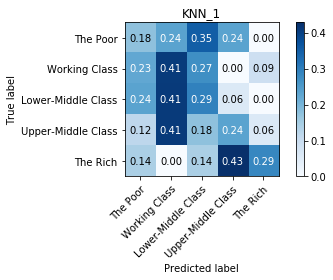

	The Poor: precision = 0.20, recall    = 0.18, f1_score  = 0.19
	Working Class: precision = 0.33, recall    = 0.41, f1_score  = 0.37
	Lower-Middle Class: precision = 0.24, recall    = 0.29, f1_score  = 0.26
	Upper-Middle Class: precision = 0.33, recall    = 0.24, f1_score  = 0.28
	The Rich: precision = 0.40, recall    = 0.29, f1_score  = 0.33
KNN_3
	overall accuracy = 0.31


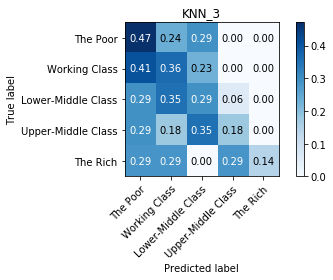

	The Poor: precision = 0.28, recall    = 0.47, f1_score  = 0.35
	Working Class: precision = 0.35, recall    = 0.36, f1_score  = 0.36
	Lower-Middle Class: precision = 0.24, recall    = 0.29, f1_score  = 0.26
	Upper-Middle Class: precision = 0.50, recall    = 0.18, f1_score  = 0.26
	The Rich: precision = 1.00, recall    = 0.14, f1_score  = 0.25
KNN_7
	overall accuracy = 0.21


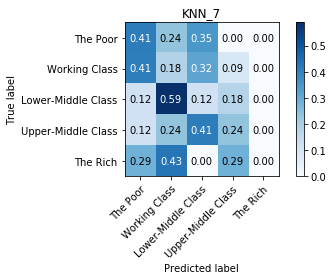

	The Poor: precision = 0.32, recall    = 0.41, f1_score  = 0.36
	Working Class: precision = 0.16, recall    = 0.18, f1_score  = 0.17
	Lower-Middle Class: precision = 0.09, recall    = 0.12, f1_score  = 0.10
	Upper-Middle Class: precision = 0.36, recall    = 0.24, f1_score  = 0.29
	The Rich: precision = 0.00, recall    = 0.00, f1_score  = 0.00
KNN_13
	overall accuracy = 0.23


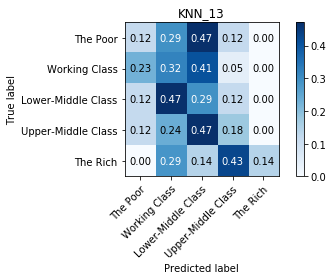

	The Poor: precision = 0.18, recall    = 0.12, f1_score  = 0.14
	Working Class: precision = 0.27, recall    = 0.32, f1_score  = 0.29
	Lower-Middle Class: precision = 0.16, recall    = 0.29, f1_score  = 0.21
	Upper-Middle Class: precision = 0.27, recall    = 0.18, f1_score  = 0.21
	The Rich: precision = 1.00, recall    = 0.14, f1_score  = 0.25
KNN_21
	overall accuracy = 0.28


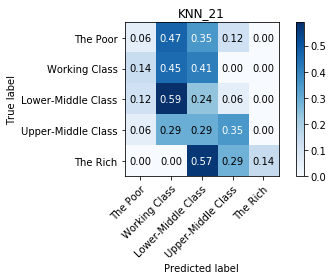

	The Poor: precision = 0.14, recall    = 0.06, f1_score  = 0.08
	Working Class: precision = 0.30, recall    = 0.45, f1_score  = 0.36
	Lower-Middle Class: precision = 0.14, recall    = 0.24, f1_score  = 0.18
	Upper-Middle Class: precision = 0.55, recall    = 0.35, f1_score  = 0.43
	The Rich: precision = 1.00, recall    = 0.14, f1_score  = 0.25
KNN_35
	overall accuracy = 0.25


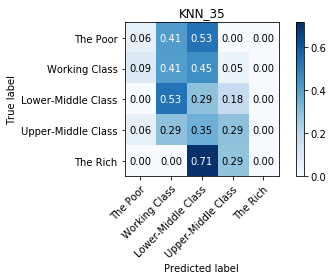

	The Poor: precision = 0.25, recall    = 0.06, f1_score  = 0.10
	Working Class: precision = 0.30, recall    = 0.41, f1_score  = 0.35
	Lower-Middle Class: precision = 0.14, recall    = 0.29, f1_score  = 0.19
	Upper-Middle Class: precision = 0.45, recall    = 0.29, f1_score  = 0.36
	The Rich: precision = 0.00, recall    = 0.00, f1_score  = 0.00


In [20]:
for name, model in models_knn.items():
    model.fit(x_train_scale, y_train)
    print(f"{name}")
    acc = metrics.accuracy_score(y_test, model.predict(x_test_scale))
    print(f'\toverall accuracy = {acc:.2f}')
    plot_confusion_matrix(y_test, model.predict(x_test_scale), classes=income_groups, title=name)
    precision = metrics.precision_score(y_test, model.predict(x_test_scale), average=None)
    recall = metrics.recall_score(y_test, model.predict(x_test_scale), average=None)
    f1 = metrics.f1_score(y_test, model.predict(x_test_scale), average=None)
    for g, i in income_groups_map.items():
        print(f"\t{g}: precision = {precision[i]:.2f}, recall    = {recall[i]:.2f}, f1_score  = {f1[i]:.2f}")


Best KNN classsifier reaches 31% accuracy (for k=3), which is better than 20% random choice over 5 classes but still low. Increasing the number of neighbors doesn't improve (or even worsens) the results. 

Poor performance of KNN may be caused by high number of features weakly correlated with classification problem. When only small part of features gives any information neighbourhood may be dominated by records that are close only based on the weak features. As shown later, limiting number of features used for KNN classifier improves results making it one of the most viable options for this classification problem.

In [21]:
k = []
acc = []
for i in range(1, 50):
    k.append(i)
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train_scale, y_train)
    acc.append(metrics.accuracy_score(y_test, model.predict(x_test_scale)))


Text(0, 0.5, 'acc')

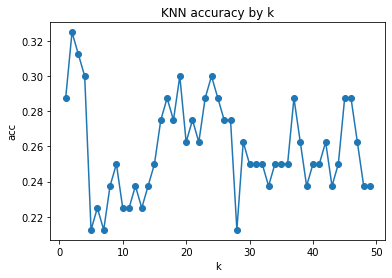

In [22]:
plt.plot(k, acc, marker='o')
plt.title('KNN accuracy by k')
plt.xlabel('k')
plt.ylabel('acc')


Testing KNN with k from 1 to 49 shows that best accuracy is obtained with k=2 at 32%.

#### Decision Tree models

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. The algorithm tries to solve the problem, by using tree representation. Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label. As it is set of binary decisions it is easy to visualize this model as a tree (example below).

DT
	accuracy = 0.62


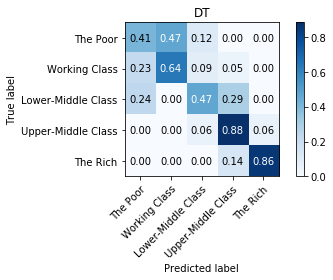

	The Poor: precision = 0.44, recall = 0.41, f1_score = 0.42
	Working Class: precision = 0.64, recall = 0.64, f1_score = 0.64
	Lower-Middle Class: precision = 0.62, recall = 0.47, f1_score = 0.53
	Upper-Middle Class: precision = 0.68, recall = 0.88, f1_score = 0.77
	The Rich: precision = 0.86, recall = 0.86, f1_score = 0.86
DT_E
	accuracy = 0.57


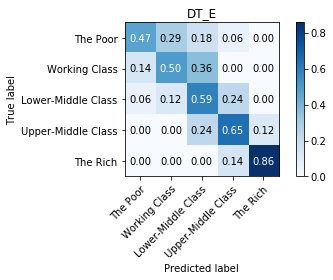

	The Poor: precision = 0.67, recall = 0.47, f1_score = 0.55
	Working Class: precision = 0.61, recall = 0.50, f1_score = 0.55
	Lower-Middle Class: precision = 0.40, recall = 0.59, f1_score = 0.48
	Upper-Middle Class: precision = 0.65, recall = 0.65, f1_score = 0.65
	The Rich: precision = 0.75, recall = 0.86, f1_score = 0.80
DT_2
	accuracy = 0.34


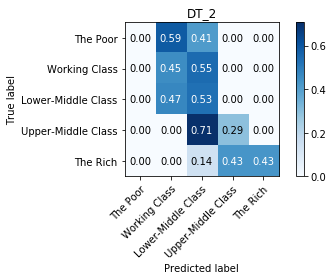

	The Poor: precision = 0.00, recall = 0.00, f1_score = 0.00
	Working Class: precision = 0.36, recall = 0.45, f1_score = 0.40
	Lower-Middle Class: precision = 0.22, recall = 0.53, f1_score = 0.31
	Upper-Middle Class: precision = 0.62, recall = 0.29, f1_score = 0.40
	The Rich: precision = 1.00, recall = 0.43, f1_score = 0.60
DT_7
	accuracy = 0.61


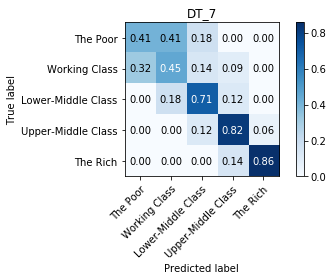

	The Poor: precision = 0.50, recall = 0.41, f1_score = 0.45
	Working Class: precision = 0.50, recall = 0.45, f1_score = 0.48
	Lower-Middle Class: precision = 0.60, recall = 0.71, f1_score = 0.65
	Upper-Middle Class: precision = 0.74, recall = 0.82, f1_score = 0.78
	The Rich: precision = 0.86, recall = 0.86, f1_score = 0.86
DT_E_7
	accuracy = 0.55


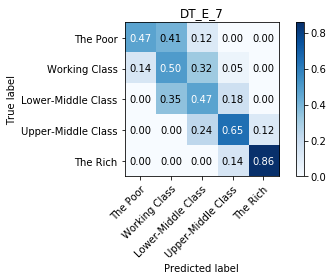

	The Poor: precision = 0.73, recall = 0.47, f1_score = 0.57
	Working Class: precision = 0.46, recall = 0.50, f1_score = 0.48
	Lower-Middle Class: precision = 0.38, recall = 0.47, f1_score = 0.42
	Upper-Middle Class: precision = 0.69, recall = 0.65, f1_score = 0.67
	The Rich: precision = 0.75, recall = 0.86, f1_score = 0.80
DT_7_S7
	accuracy = 0.61


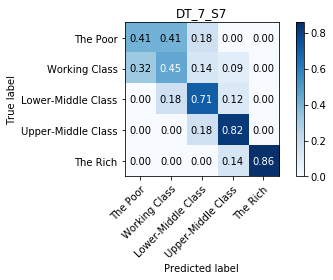

	The Poor: precision = 0.50, recall = 0.41, f1_score = 0.45
	Working Class: precision = 0.50, recall = 0.45, f1_score = 0.48
	Lower-Middle Class: precision = 0.57, recall = 0.71, f1_score = 0.63
	Upper-Middle Class: precision = 0.74, recall = 0.82, f1_score = 0.78
	The Rich: precision = 1.00, recall = 0.86, f1_score = 0.92
DT_7_S13
	accuracy = 0.57


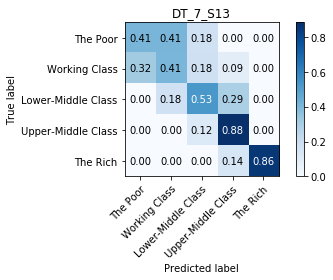

	The Poor: precision = 0.50, recall = 0.41, f1_score = 0.45
	Working Class: precision = 0.47, recall = 0.41, f1_score = 0.44
	Lower-Middle Class: precision = 0.50, recall = 0.53, f1_score = 0.51
	Upper-Middle Class: precision = 0.65, recall = 0.88, f1_score = 0.75
	The Rich: precision = 1.00, recall = 0.86, f1_score = 0.92
DT_13
	accuracy = 0.62


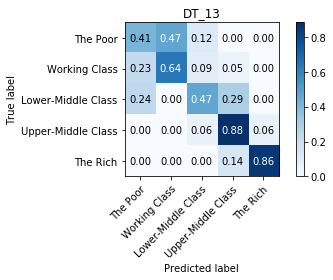

	The Poor: precision = 0.44, recall = 0.41, f1_score = 0.42
	Working Class: precision = 0.64, recall = 0.64, f1_score = 0.64
	Lower-Middle Class: precision = 0.62, recall = 0.47, f1_score = 0.53
	Upper-Middle Class: precision = 0.68, recall = 0.88, f1_score = 0.77
	The Rich: precision = 0.86, recall = 0.86, f1_score = 0.86
DT_15
	accuracy = 0.62


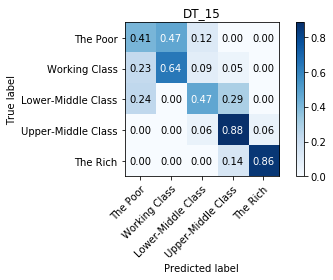

	The Poor: precision = 0.44, recall = 0.41, f1_score = 0.42
	Working Class: precision = 0.64, recall = 0.64, f1_score = 0.64
	Lower-Middle Class: precision = 0.62, recall = 0.47, f1_score = 0.53
	Upper-Middle Class: precision = 0.68, recall = 0.88, f1_score = 0.77
	The Rich: precision = 0.86, recall = 0.86, f1_score = 0.86


In [23]:
for name, model in models_dt.items():
    model.fit(x_train, y_train)
    print(f"{name}")
    acc = metrics.accuracy_score(y_test, model.predict(x_test))
    print(f'\taccuracy = {acc:.2f}')
    plot_confusion_matrix(y_test, model.predict(x_test), classes=income_groups, title=name)
    precision = metrics.precision_score(y_test, model.predict(x_test), average=None)
    recall = metrics.recall_score(y_test, model.predict(x_test), average=None)
    f1 = metrics.f1_score(y_test, model.predict(x_test), average=None)
    for g, i in income_groups_map.items():
        print(f"\t{g}: precision = {precision[i]:.2f}, recall = {recall[i]:.2f}, f1_score = {f1[i]:.2f}")


Best DT classifier from declared achieves accuracy of 62% highly exceeding KNN result.  
It is easy to see by look of confusion matrices itself that the effectiveness of the method is much higher than for kNN.

Grid search to find best DT model:

In [24]:
grid_param = {  
    'max_depth': [None, 3, 5, 7, 11, 15, 21],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 7, 11, 15, 20, 30],
    'min_samples_leaf': [1, 3, 5, 7],
    'random_state': [42]
}


- `max_depth` - The maximum depth of the tree.
- `criterion` - The function to measure the quality of a split, one having the best value is chosen from all tested splits.
- `min_samples_split` - The minimum number of samples required to split an internal node.
- `min_samples_leaf`- The minimum number of samples required to be at a leaf node.

In [25]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
search = GridSearchCV(estimator=model,
                      param_grid=grid_param,
                      scoring='accuracy',
                      cv=5)

search.fit(x_train, y_train)

print("Best parameters set found on development set:")
for param, val in search.best_params_.items():
    print(f"\t{param}: {val}")

print("\nDetailed classification report:")
y_true, y_pred = y_test, search.predict(x_test)
print(metrics.classification_report(y_true, y_pred))


Best parameters set found on development set:
	criterion: entropy
	max_depth: None
	min_samples_leaf: 1
	min_samples_split: 5
	random_state: 42

Detailed classification report:
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        17
           1       0.60      0.55      0.57        22
           2       0.67      0.59      0.62        17
           3       0.70      0.82      0.76        17
           4       0.75      0.86      0.80         7

    accuracy                           0.64        80
   macro avg       0.65      0.67      0.66        80
weighted avg       0.63      0.64      0.63        80



/home/oskam/credit/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


	accuracy = 0.64


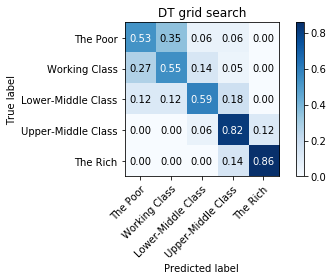

	The Poor: precision = 0.53, recall    = 0.53, f1_score  = 0.53
	Working Class: precision = 0.60, recall    = 0.55, f1_score  = 0.57
	Lower-Middle Class: precision = 0.67, recall    = 0.59, f1_score  = 0.62
	Upper-Middle Class: precision = 0.70, recall    = 0.82, f1_score  = 0.76
	The Rich: precision = 0.75, recall    = 0.86, f1_score  = 0.80


In [26]:
model = DecisionTreeClassifier(**search.best_params_)
model.fit(x_train, y_train)
acc = metrics.accuracy_score(y_test, model.predict(x_test))
print(f'\taccuracy = {acc:.2f}')
plot_confusion_matrix(y_test, model.predict(x_test), classes=income_groups, title='DT grid search')
precision = metrics.precision_score(y_test, model.predict(x_test), average=None)
recall = metrics.recall_score(y_test, model.predict(x_test), average=None)
f1 = metrics.f1_score(y_test, model.predict(x_test), average=None)
for g, i in income_groups_map.items():
    print(f"\t{g}: precision = {precision[i]:.2f}, recall    = {recall[i]:.2f}, f1_score  = {f1[i]:.2f}")


By using grid search, to test multiple combinations of model arguments, DT accuracy was improved to 64%. Confusion matrix shows that most samples for each class are predicted properly and wrong predictions are concentrated around matrix's diagonal - most of missclasifications happen between adjacent classes.

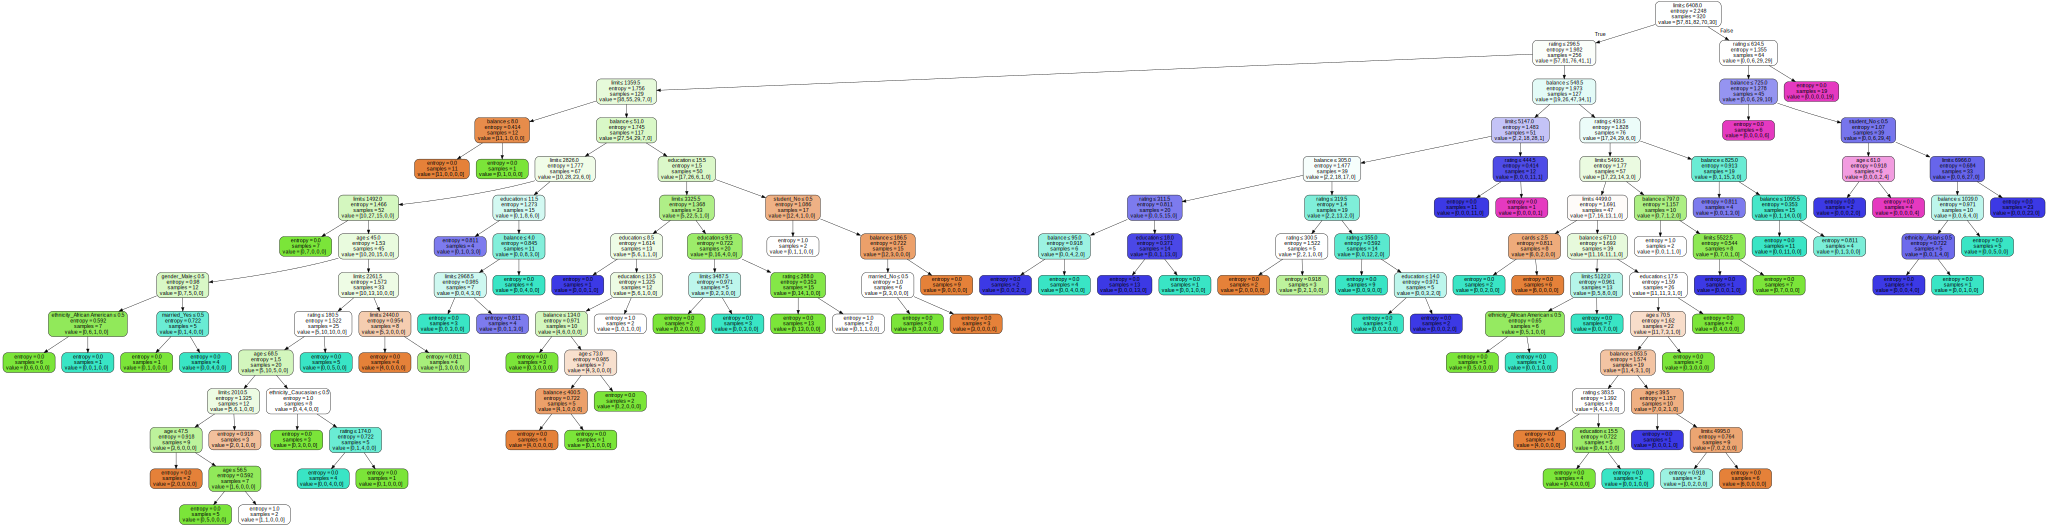

In [27]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=x_train.columns,
                                filled=True, rounded=True,
                                special_characters=True)
before, after = dot_data.split('{', 1)
after = 'size="30,30!";\nmargin=0;\n' + after
dot_data = '{'.join([before, after]) 
graph = graphviz.Source(dot_data)
graph.render("dt-graph")
graph


Diagram above presents decision tree.  

Each node contains: 
- split condition, 
- decision criterion value, 
- number of samples in a subtree with the root at this node,
- distribution of those samples across classes.

Nodes are colored according to the dominant class of the samples, color saturation increases with domination of that class - node is white when there is no dominant class and has solid color in leafs when only one class is left.

First leaf can be found at depth 2, classifying 19 samples to the 5th class. Total depth of the tree is 13

#### Logistic Regression models

In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function (1 / (1 + e^-value)), also called the sigmoid function, that can take any real-valued number and map it into a value between 0 and 1. Outputs of this function are used as a probability. In multiclass problems logistic function is fitted for each class and for given value one having highest probability is selected.

Logistic Regression same as KNN works better on scaled values. It achieves best result of 59% accuracy putting it near DT effectivness.

LR_NI
	accuracy = 0.46


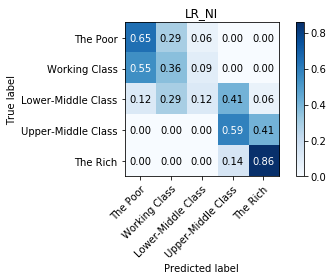

	The Poor: precision = 0.44, recall    = 0.65, f1_score  = 0.52
	Working Class: precision = 0.44, recall    = 0.36, f1_score  = 0.40
	Lower-Middle Class: precision = 0.40, recall    = 0.12, f1_score  = 0.18
	Upper-Middle Class: precision = 0.56, recall    = 0.59, f1_score  = 0.57
	The Rich: precision = 0.43, recall    = 0.86, f1_score  = 0.57
LR
	accuracy = 0.59


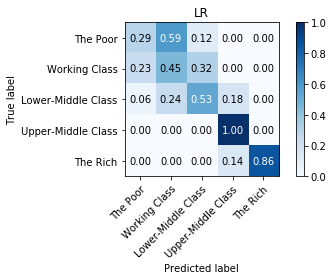

	The Poor: precision = 0.45, recall    = 0.29, f1_score  = 0.36
	Working Class: precision = 0.42, recall    = 0.45, f1_score  = 0.43
	Lower-Middle Class: precision = 0.50, recall    = 0.53, f1_score  = 0.51
	Upper-Middle Class: precision = 0.81, recall    = 1.00, f1_score  = 0.89
	The Rich: precision = 1.00, recall    = 0.86, f1_score  = 0.92


In [28]:
for name, model in models_lr.items():
    model.fit(x_train_scale, y_train)
    print(f"{name}")
    acc = metrics.accuracy_score(y_test, model.predict(x_test_scale))
    print(f'\taccuracy = {acc:.2f}')
    plot_confusion_matrix(y_test, model.predict(x_test_scale), classes=income_groups, title=name)
    precision = metrics.precision_score(y_test, model.predict(x_test_scale), average=None)
    recall = metrics.recall_score(y_test, model.predict(x_test_scale), average=None)
    f1 = metrics.f1_score(y_test, model.predict(x_test_scale), average=None)
    for g, i in income_groups_map.items():
        print(f"\t{g}: precision = {precision[i]:.2f}, recall    = {recall[i]:.2f}, f1_score  = {f1[i]:.2f}")


#### Random Forest models

The algorithm to induce a random forest will create a bunch of random decision trees automatically. Since the trees are generated at random, most won't be all that meaningful to learning classification problem, but it avoids overfitting by generating each decision tree on subset of the data and subset of the features.

RF_10
	accuracy = 0.42


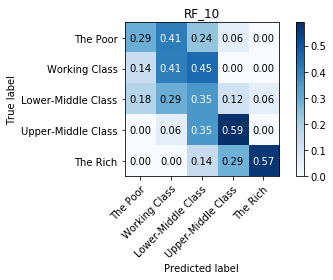

	The Poor: precision = 0.45, recall    = 0.29, f1_score  = 0.36
	Working Class: precision = 0.41, recall    = 0.41, f1_score  = 0.41
	Lower-Middle Class: precision = 0.22, recall    = 0.35, f1_score  = 0.27
	Upper-Middle Class: precision = 0.67, recall    = 0.59, f1_score  = 0.62
	The Rich: precision = 0.80, recall    = 0.57, f1_score  = 0.67
RF_10_NB
	accuracy = 0.44


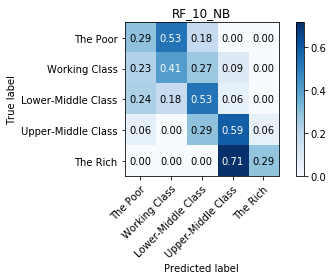

	The Poor: precision = 0.33, recall    = 0.29, f1_score  = 0.31
	Working Class: precision = 0.43, recall    = 0.41, f1_score  = 0.42
	Lower-Middle Class: precision = 0.39, recall    = 0.53, f1_score  = 0.45
	Upper-Middle Class: precision = 0.56, recall    = 0.59, f1_score  = 0.57
	The Rich: precision = 0.67, recall    = 0.29, f1_score  = 0.40
RF_20
	accuracy = 0.49


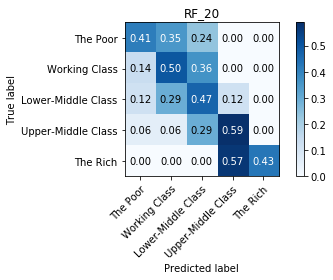

	The Poor: precision = 0.54, recall    = 0.41, f1_score  = 0.47
	Working Class: precision = 0.48, recall    = 0.50, f1_score  = 0.49
	Lower-Middle Class: precision = 0.32, recall    = 0.47, f1_score  = 0.38
	Upper-Middle Class: precision = 0.62, recall    = 0.59, f1_score  = 0.61
	The Rich: precision = 1.00, recall    = 0.43, f1_score  = 0.60
RF_20_NB
	accuracy = 0.51


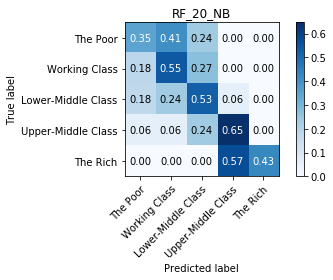

	The Poor: precision = 0.43, recall    = 0.35, f1_score  = 0.39
	Working Class: precision = 0.50, recall    = 0.55, f1_score  = 0.52
	Lower-Middle Class: precision = 0.39, recall    = 0.53, f1_score  = 0.45
	Upper-Middle Class: precision = 0.69, recall    = 0.65, f1_score  = 0.67
	The Rich: precision = 1.00, recall    = 0.43, f1_score  = 0.60
RF_40
	accuracy = 0.46


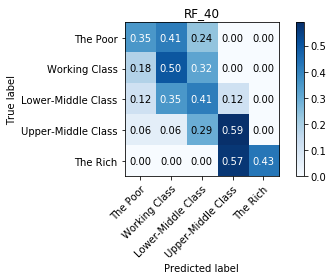

	The Poor: precision = 0.46, recall    = 0.35, f1_score  = 0.40
	Working Class: precision = 0.44, recall    = 0.50, f1_score  = 0.47
	Lower-Middle Class: precision = 0.30, recall    = 0.41, f1_score  = 0.35
	Upper-Middle Class: precision = 0.62, recall    = 0.59, f1_score  = 0.61
	The Rich: precision = 1.00, recall    = 0.43, f1_score  = 0.60


In [29]:
for name, model in models_rf.items():
    model.fit(x_train, y_train)
    print(f"{name}")
    acc = acc = metrics.accuracy_score(y_test, model.predict(x_test))
    print(f'\taccuracy = {acc:.2f}')
    plot_confusion_matrix(y_test, model.predict(x_test), classes=income_groups, title=name)
    precision = metrics.precision_score(y_test, model.predict(x_test), average=None)
    recall = metrics.recall_score(y_test, model.predict(x_test), average=None)
    f1 = metrics.f1_score(y_test, model.predict(x_test), average=None)
    for g, i in income_groups_map.items():
        print(f"\t{g}: precision = {precision[i]:.2f}, recall    = {recall[i]:.2f}, f1_score  = {f1[i]:.2f}")


Best accuracy with Random Forest reaches 51% leaving a lot of room for improvement.

### Improve model by Random Forest feature importance analysis

Random Forest classifier allows tracking importance of the features as they were used during learning process. By visualising the features importance one can select the good ones for accurate predictions.

accuracy = 0.51


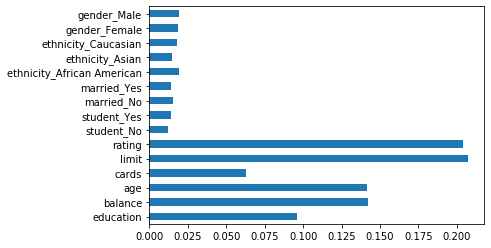

In [30]:
x = pd.concat(
	(
		data[['education', 'balance', 'age', 'cards', 'limit', 'rating']], 
		pd.get_dummies(data[['student', 'married', 'ethnicity', 'gender']])
	), 
	axis=1
)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = models_rf['RF_20_NB']
model.fit(x_train, y_train)
acc = metrics.accuracy_score(y_test, model.predict(x_test))
print(f'accuracy = {acc:.2f}')
ftr_imp = pd.Series(model.feature_importances_, index=x_train.columns)
_ = ftr_imp.plot(kind='barh')


Remove categorical data as it's importance is much lower than other features.

In [31]:
x2 = data[['education', 'balance', 'age', 'cards', 'limit', 'rating']]
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size=0.2, random_state=42)

model = models_rf['RF_20_NB']
model.fit(x2_train, y_train)
acc = metrics.accuracy_score(y_test, model.predict(x2_test))
print(f'accuracy = {acc:.2f}')


accuracy = 0.57


Accuracy improved by 6% from 51% for all features to 57% with only numerical features.

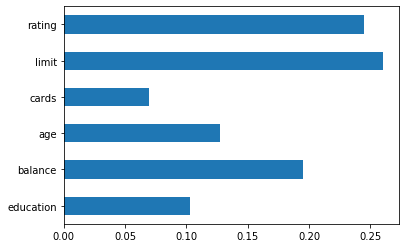

In [32]:
ftr_imp = pd.Series(model.feature_importances_, index=x2_train.columns)
_ = ftr_imp.plot(kind='barh')

Remove `Age`, `Cards`, `Education` numerical features as they are the least important, for categorcial features keep only `Gender` as it seems to be the strongest one.

In [33]:
# x3 = data[['balance', 'age', 'limit', 'rating']]
x3 = pd.concat(
	(
		data[['balance', 'limit', 'rating']], 
		pd.get_dummies(data[['gender']])
	), 
	axis=1
)
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, test_size=0.2, random_state=42)

model = models_rf['RF_20_NB']
model.fit(x3_train, y_train)
acc = metrics.accuracy_score(y_test, model.predict(x3_test))
print(f'accuracy = {acc:.2f}')

accuracy = 0.59


Accuracy improved by 2% up to 59% in comparison to the previous modification.

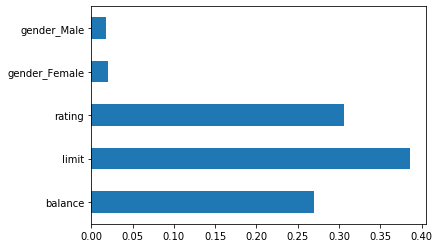

In [34]:
ftr_imp = pd.Series(model.feature_importances_, index=x3_train.columns)
_ = ftr_imp.plot(kind='barh')

Remove `Gender` data and leave only the strongest numerical features.

In [35]:
x4 = data[['balance', 'limit', 'rating']]
x4_train, x4_test, y_train, y_test = train_test_split(x4, y, test_size=0.2, random_state=42)

model = models_rf['RF_20_NB']
model.fit(x4_train, y_train)
acc = metrics.accuracy_score(y_test, model.predict(x4_test))
print(f'accuracy = {acc:.2f}')

accuracy = 0.71


Accuracy improved again, this time by 12% up to 71%.

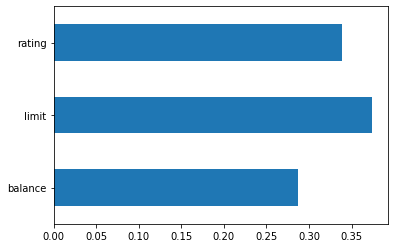

In [36]:
ftr_imp = pd.Series(model.feature_importances_, index=x4_train.columns)
_ = ftr_imp.plot(kind='barh')

In [37]:
x5 = data[['limit', 'rating']]
x5_train, x5_test, y_train, y_test = train_test_split(x5, y, test_size=0.2, random_state=42)

model = models_rf['RF_20_NB']
model.fit(x5_train, y_train)
acc = metrics.accuracy_score(y_test, model.predict(x5_test))
print(f'accuracy = {acc:.2f}')

accuracy = 0.39


Further limiting data to only 2 strongest features drasticly reduces accuracy. Importance of `Balance` is proved by boxplot by `Income Group` showing that it regularly rises by each group making it strong feature for `Income Group` prediction. Scatter matrix shows that `Limit` and `Rating` are strongly correlated and probably only one of them is enough for features set.

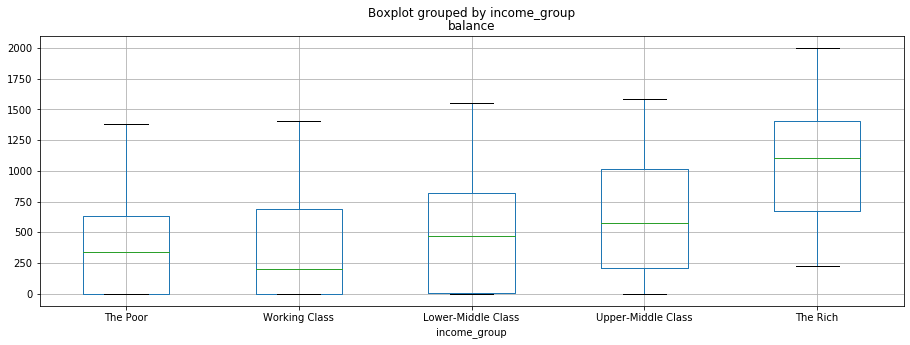

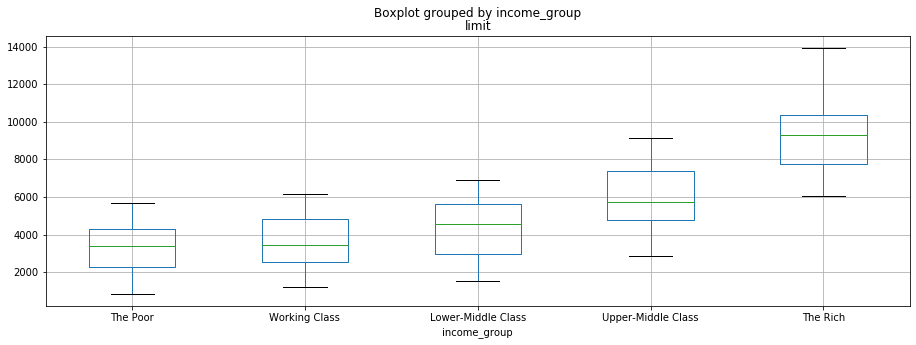

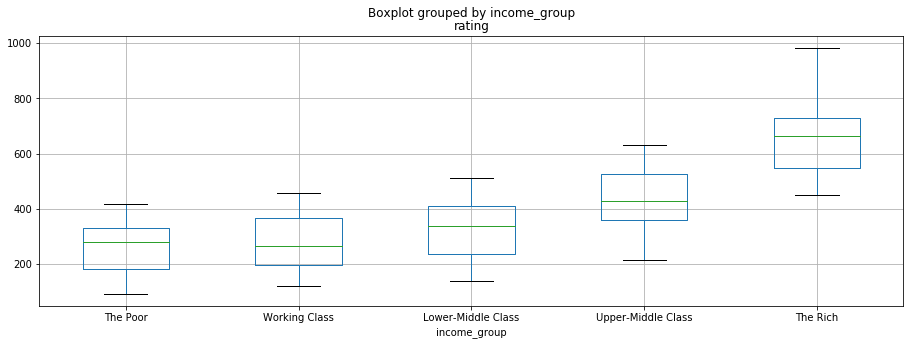

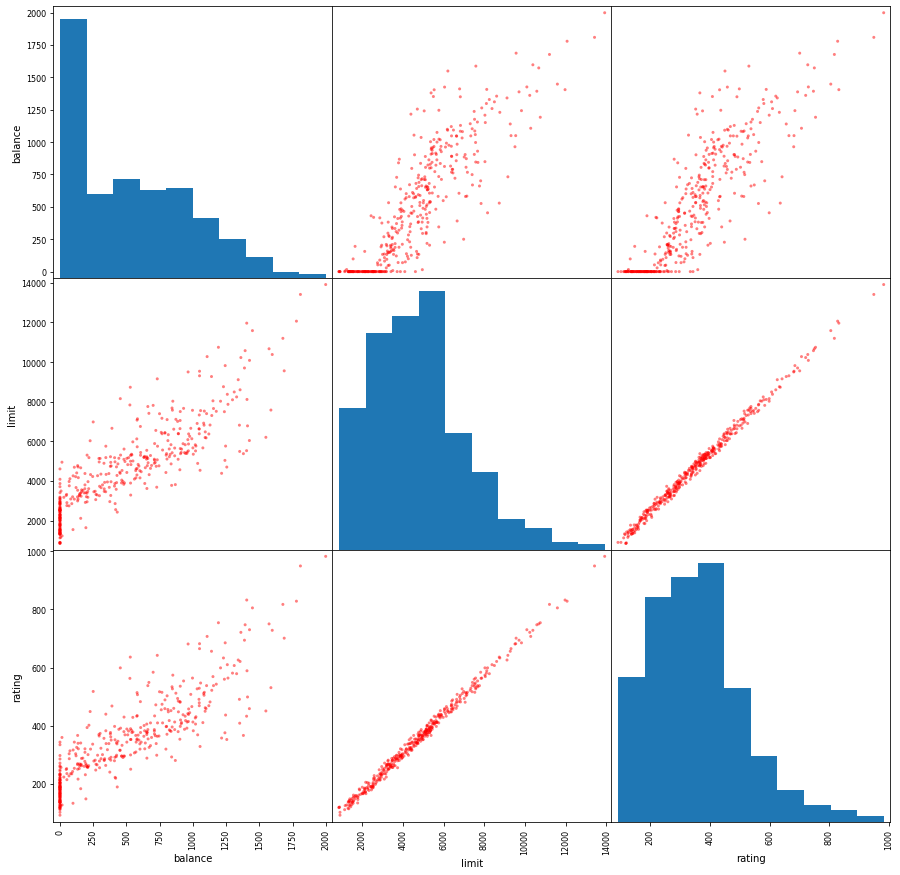

In [38]:
_ = data.boxplot(column='balance', by='income_group', figsize=(15,5))
_ = data.boxplot(column='limit', by='income_group', figsize=(15,5))
_ = data.boxplot(column='rating', by='income_group', figsize=(15,5))
_ = pd.plotting.scatter_matrix(data[['balance', 'limit', 'rating']], color="red", figsize=(15, 15))

In [39]:
x6 = data[['balance', 'limit']]
x6_train, x6_test, y_train, y_test = train_test_split(x6, y, test_size=0.2, random_state=42)

model = models_rf['RF_20_NB']
model.fit(x6_train, y_train)
acc = metrics.accuracy_score(y_test, model.predict(x6_test))
print(f'accuracy = {acc:.2f}')


accuracy = 0.70


Selecting only `Limit` alongside `Balance` gives accuracy different by 1% at 70%. Prediction using only 2 features may increase bias.

###  Decision boundaries

With only 2 features used it is posible to visualize classification criteria as decision boundary. This visualization of the decision boundary in feature space is done on a scatter plot where every point depicts a record of the dataset and axes depicting the features. The decision boundary separates the datapoints into regions, which are actually the classes in which they belong.

On plots below, background color depicts those regions of classes probabilities. Desaturated points mark training set samples and saturated points are test set samples, so it is easy to see missclassifications on the test set. Each classifier has its accuracy noted in plot title and legend of classes colors is shown on first general plot showing only samples distribution by 2 used features. 

In [40]:
from math import ceil
def plot_decision_boundaries(X, y, models, maxcols=3):
    hx = X[:, 0].max() / 100
    hy = X[:, 1].max() / 100
    h = max(hx, hy)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    
    x_min, x_max = X[:, 0].min() - hx, X[:, 0].max() + hx
    y_min, y_max = X[:, 1].min() - hy, X[:, 1].max() + hy
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))
    
    cols = min(maxcols, len(models)+1)
    rows = int(ceil((len(models)+1)/cols))
    
    figure, axes = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(5*cols,5*rows))
    
    axes = axes.flat
    
    axes[0].set_xlim(xx.min(), xx.max())
    axes[0].set_ylim(yy.min(), yy.max())
    axes[0].set_xticks(())
    axes[0].set_yticks(())
    axes[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', alpha=0.4)
    scatter = axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='o')
    axes[0].legend(*[scatter.legend_elements()[0], income_groups])
    
    i = 1
    for name, model in models.items():
        model.fit(X_train, y_train)
        acc = metrics.accuracy_score(y_test, model.predict(X_test))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        axes[i].contourf(xx, yy, Z, alpha=0.3)
        axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', alpha=0.4)
        axes[i].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='o')
        axes[i].set_title(f'{name}, acc={acc:.2f}')
        i += 1
        
    plt.tight_layout()
    plt.show()


In [41]:
x7 = data[['balance', 'limit']].values
y7 = data['income_group_index'].values

scaler = StandardScaler()
scaler.fit(x7)
x7_scale = scaler.transform(x7)

#### Decision boundaries for KNN using `Limit` and `Balance`

Using decision boundary it is easy to see that KNN with k = 1 causes overfitting as few 'islands' of yellow (The Rich) class are created - it causes several green (Upper-Middle Class) to get wrongly labelled decreasing accuracy. Best separation is achieved with k = 7 and then the higher the k the worse the result. With k = 35 the classes with less or more spread-out points suffer most which is clearly visible in calse of yellow points (The Rich) getting missclassified as green by their high population.

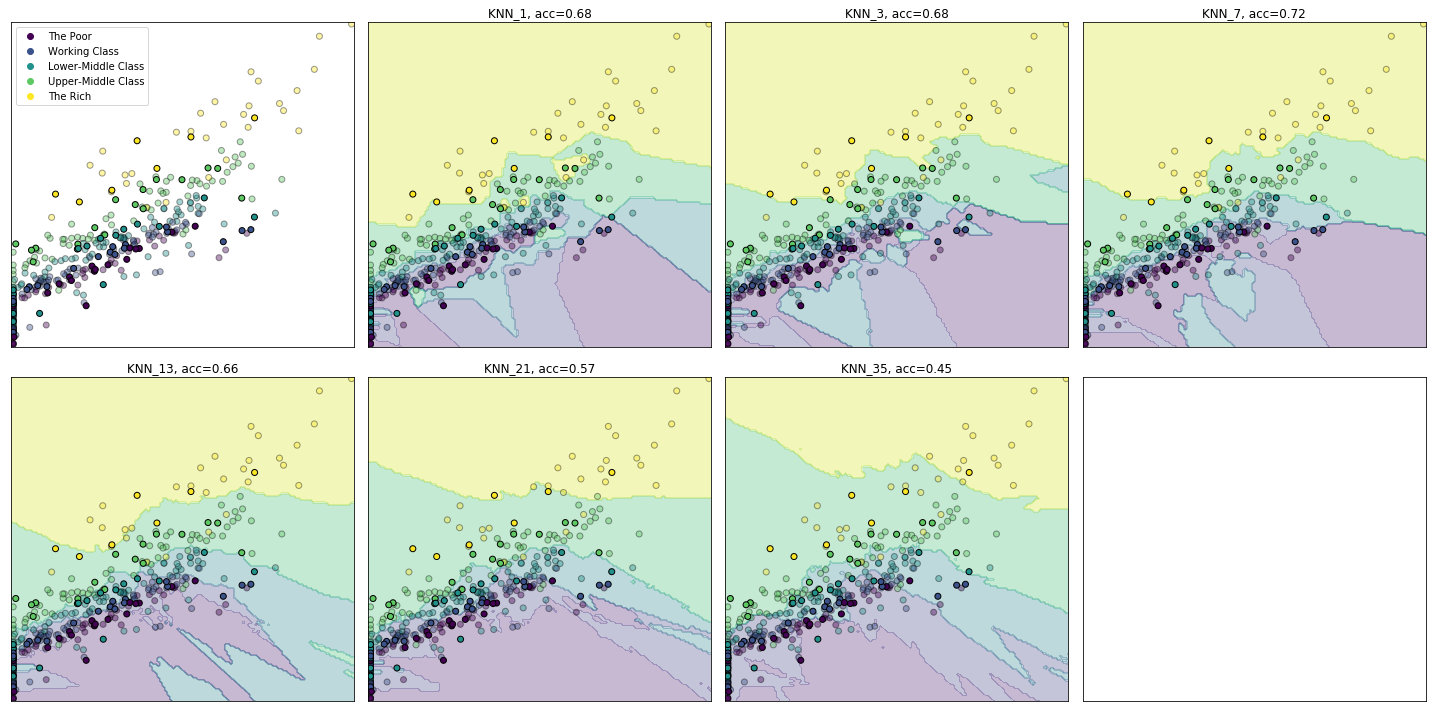

In [42]:
plot_decision_boundaries(x7_scale, y, models_knn, maxcols=4)

#### Decision boundaries for DT using `Limit` and `Balance`

Plots for decision trees show how it works - each decision splits considered region along value of one of the features. With DT_2 - that is a tree with `max_depth=2` parameter - it is visible that only 3 decision were made as tree of depth 2 has at most 4 leafs and 3 internal nodes (with root). Less restricted decision trees produce better results by allowing more accurate split of the samples space.

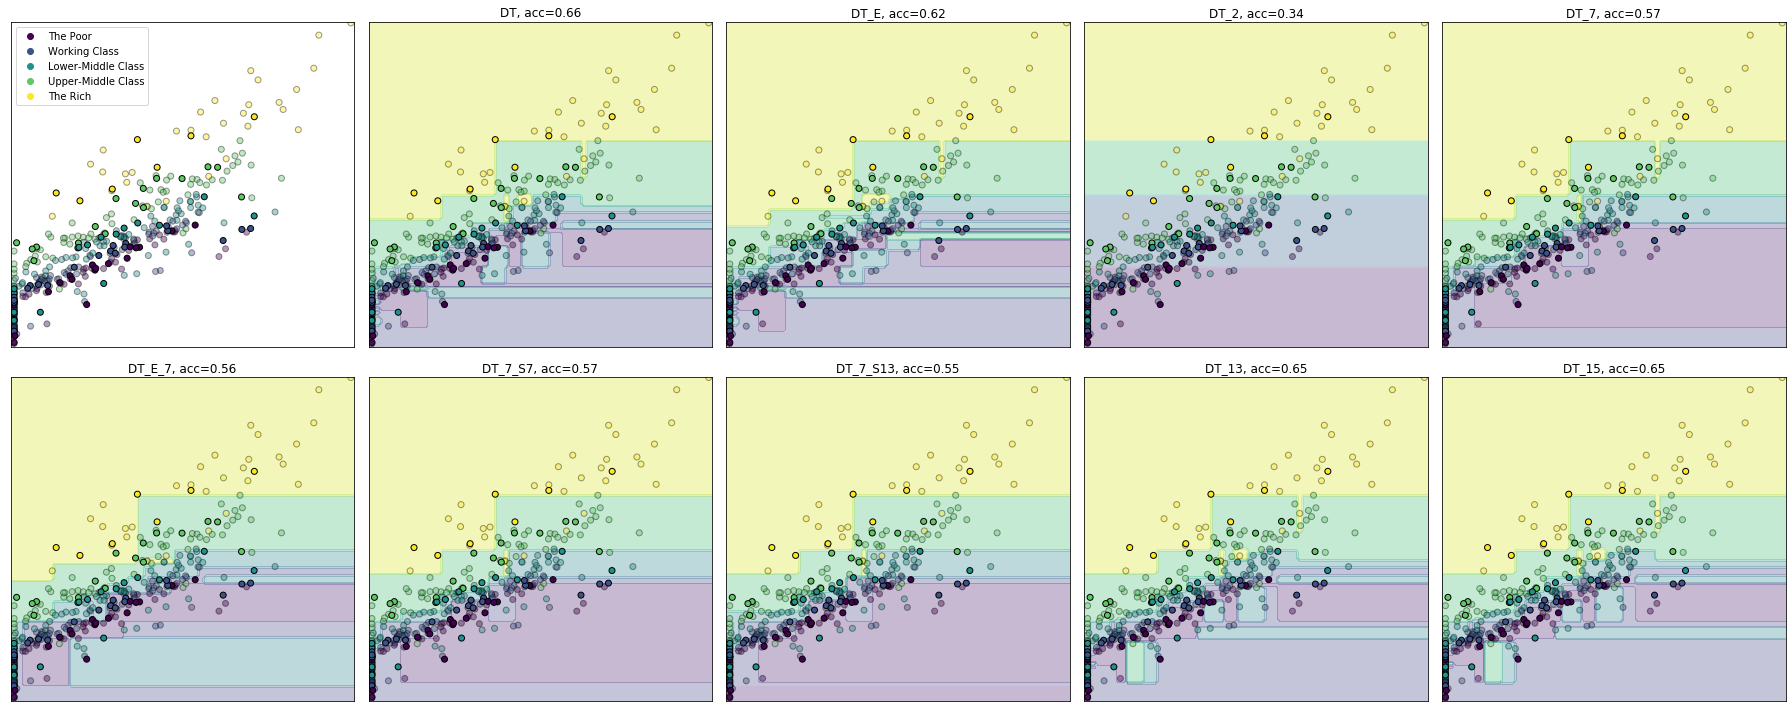

In [43]:
plot_decision_boundaries(x7, y, models_dt, maxcols=5)

#### Decision boundaries for LR using `Limit` and `Balance`

For logistic regression it is hard to adapt to classes that are not linearly separable. With two features, the decision boundary is a line along which the logistic function takes values equal to 1/2 - that is the threshold value in the middle of logistic function ranging from 0 to 1.

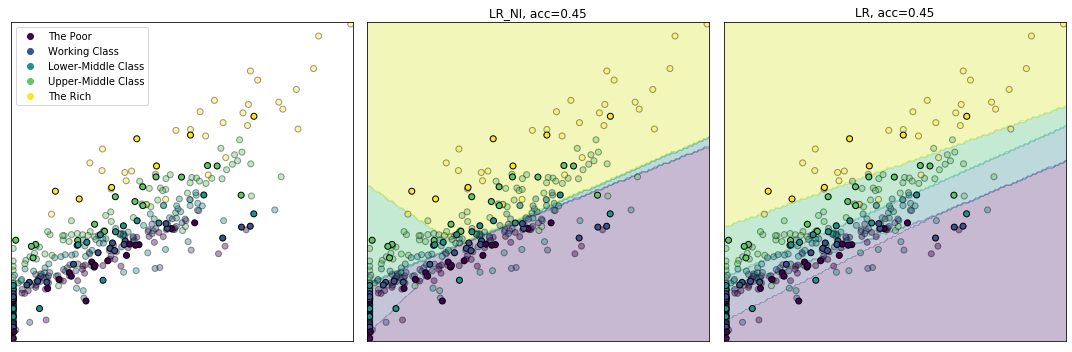

In [44]:
plot_decision_boundaries(x7_scale, y, models_lr)

#### Decision boundaries for RF using `Limit` and `Balance`

Random Forest visualization can be imagined as an average over several decision trees used for random forest generation. It is visible that random forests generate lot of separated regions. 

Random forests without weight balancing (`_NB`) have decision boundary most similar to decision trees with less splits at x axis values - suggesting that y axis feature is dominating it. At the same time version with weight balancing achieves better result making it the best one (together with KNN_7) from all classifiers.

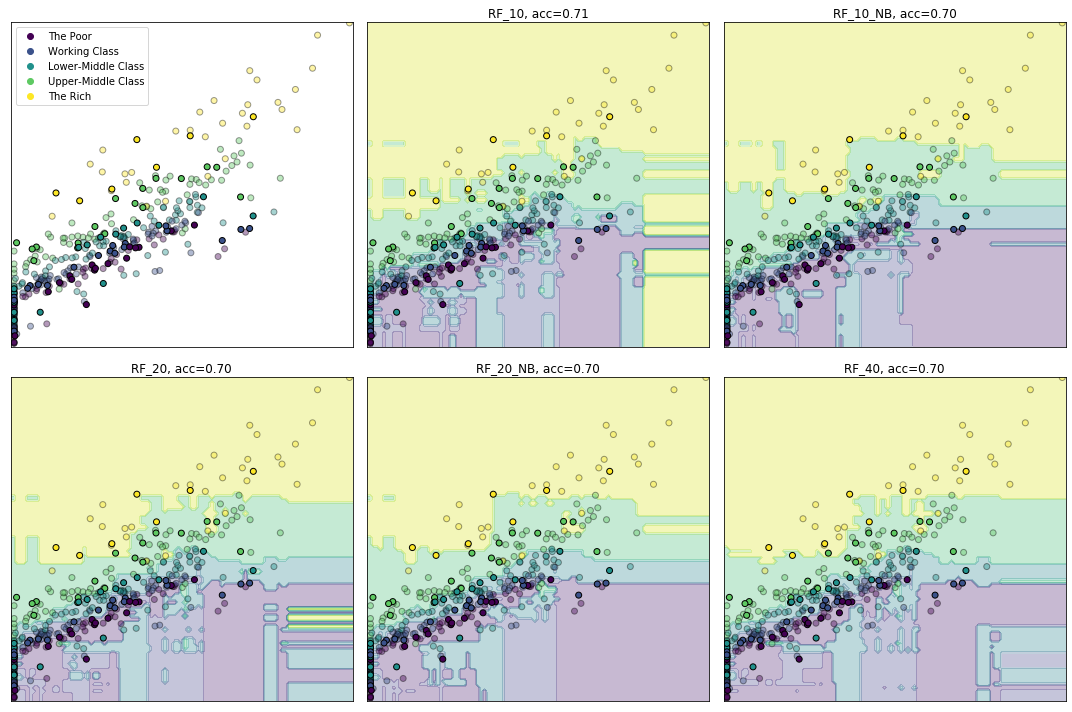

In [45]:
plot_decision_boundaries(x7, y, models_rf)

### Best model

Testing once again on all models but with the best features used only (*x4*) improves results with most improvent for KNN classifier making it equal to best RF with 71% accuracy. **Which proves that proper data analysis and features selection makes a big difference in classifiers performance.**

In [46]:
scaler = StandardScaler()
scaler.fit(x4_train)

x4_train_scale = scaler.transform(x4_train)
x4_test_scale = scaler.transform(x4_test)

for name, model in models.items():
	if 'KNN' in name or 'LR' in name:
		model.fit(x4_train_scale, y_train)
		acc = metrics.accuracy_score(y_test, model.predict(x4_test_scale))
	else:
		model.fit(x4_train, y_train)
		acc = metrics.accuracy_score(y_test, model.predict(x4_test))
	print(f"{name}")
	print(f'\taccuracy = {acc:.2f}')

KNN_1
	accuracy = 0.66
KNN_3
	accuracy = 0.71
KNN_7
	accuracy = 0.71
KNN_13
	accuracy = 0.62
KNN_21
	accuracy = 0.57
KNN_35
	accuracy = 0.42
DT
	accuracy = 0.66
DT_E
	accuracy = 0.65
DT_2
	accuracy = 0.34
DT_7
	accuracy = 0.60
DT_E_7
	accuracy = 0.60
DT_7_S7
	accuracy = 0.61
DT_7_S13
	accuracy = 0.57
DT_13
	accuracy = 0.65
DT_15
	accuracy = 0.65
LR_NI
	accuracy = 0.41
LR
	accuracy = 0.41
RF_10
	accuracy = 0.69
RF_10_NB
	accuracy = 0.66
RF_20
	accuracy = 0.69
RF_20_NB
	accuracy = 0.71
RF_40
	accuracy = 0.66


## Neural Network

In [47]:
import keras

Using TensorFlow backend.


In [48]:
from keras.utils import to_categorical
y_binary = to_categorical(y, num_classes=5)

x_train, x_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scale = scaler.transform(x_train)
x_test_scale = scaler.transform(x_test)

Prepare NN model with 4 layers:

1. Input Dense layer with 512 outputs with Rectified Linear Unit (ReLU) function and 10% dropout.
2. Dense layer with 512 outputs with ReLU function and 50% dropout.
3. Dense layer with 256 outputs with ReLU function and 50% dropout.
4. Output Dense layer with Softmax activation function to generate probabilities.

ReLU simply takes *max(0, val)* at output from node. Dropout means that *x%* of nodes are deactivated at layer's output to limit overfitting. Softmax function returns as output vector with values summing up to *1.0* allowing use of this reslut as probability distribution over categories and taking one with highest value as the prediction. 

In [49]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(512, input_shape=(x_train.shape[1],), activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(5, activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               8192      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)  

Set network's optimizer to RMSProp optimizer as it is recomended in Keras docs. As a loss function use cross-entropy between an approximating distribution and a true distribution which will be minimized during learning process. Metric is set to accuracy for comparison with previous results.

In [50]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Define calback that will stop learning process after 32 epochs without improvement in validation accuracy of at least 0.2%.

In [51]:
stop_callback = keras.callbacks.EarlyStopping(
    monitor='val_acc', 
    min_delta=0.002,
    patience=32,
    verbose=0,
    mode='max',
    restore_best_weights=True
)

Train network over maximum of 256 epochs with batch size of 32 - that is run 256 training iterations over x and y data with 32 samples used for gradient update. Stop callback will interrupt training if no improvement is done.

In [52]:
history = model.fit(
    x_train_scale,
    y_train,
    epochs=256,
    verbose=False,
    batch_size=32,
    validation_data=(x_test_scale, y_test),
    callbacks=[stop_callback]
)
print("FINISHED")

Instructions for updating:
Use tf.cast instead.
FINISHED


#### Check Neural Network's accuracy over test data.

In [53]:
_, acc = model.evaluate(x_test_scale, y_test, batch_size=32)
print(f'\taccuracy = {acc:.2f}')

80/80 [==============================] - 0s 50us/step
	accuracy = 0.71


Using simple NN using 3 ReLU layers and 1 Softmax output layer on entire data without any selection or analysis gives model with around 70% accuracy over best result from Decision Tree at 62% and best result for Random Forest at 51% (on all features).

In [54]:
x4_train, x4_test, y_train, y_test = train_test_split(x4, y_binary, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(x4_train)

x4_train_scale = scaler.transform(x4_train)
x4_test_scale = scaler.transform(x4_test)
model = keras.models.Sequential()
model.add(keras.layers.Dense(512, input_shape=(x4_train.shape[1],), activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(5, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    x4_train_scale,
    y_train,
    epochs=256,
    verbose=False,
    batch_size=32,
    validation_data=(x4_test_scale, y_test),
    callbacks=[stop_callback]
)
print("FINISHED")
_, acc = model.evaluate(x4_test_scale, y_test, batch_size=32)
print(f'\taccuracy = {acc:.2f}')

FINISHED
80/80 [==============================] - 0s 58us/step
	accuracy = 0.80


By using only the best features, as determined by feature's importances in Random Forest model, accuracy improved to 82% from best result for Random Forest at 71%. NN's ability to adapt to data and extract the important features and their values proves to be it's strong advantage over regular statistical learning methods, especially for unexperienced 'scientists'.